In [45]:
import numpy as np
from scipy.integrate import trapezoid
from matplotlib import pyplot as plt
import scipy.stats

In [46]:
def mu(t):
    return 0.1 * t

def sigma(t):
    return (6 + 2*t)/100  #0.06 + 0.02t

In [47]:
def compute_asset_5 (t_values, S0 = 10, n_mc = 10000):
    S_results = []
    B_results = []
    
    for t in t_values:
        t_grid = np.linspace(0, t, 1000)
        mu_vals = mu(t_grid)
        sigma_vals = sigma(t_grid)
        

        int_B = trapezoid(mu_vals, t_grid)
        Bt = S0 * np.exp(int_B)
        B_results.append(Bt)
        

        integrand_S = mu_vals
        int1 = trapezoid(integrand_S, t_grid)
        
        dt = t_grid[1] - t_grid[0]
        dW = np.random.normal(0, np.sqrt(dt), size=(n_mc, len(t_grid)))
        int2 = np.mean(np.sum(sigma_vals * dW, axis=1))
        
        St = S0 * np.exp(int1 + int2)
        S_results.append(St)
    
    return np.array(S_results), np.array(B_results)

# Вычисление цен
  
t_points = np.arange(0, 4.1, 0.5)
get_b, _ = compute_asset_5(S0=10, t_values=t_points)

In [48]:
r = 0.1

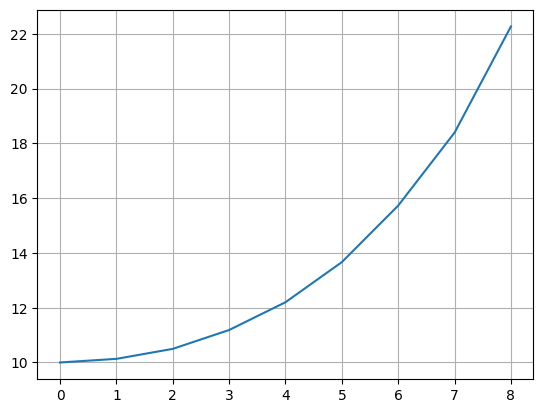

In [49]:
plt.plot(get_b)
plt.grid(visible=True)

In [50]:
St = get_b[2]
Et = St *(8/7)
tau = 1

In [51]:
d1 = (np.log(St) - np.log(Et) + (r+ ((sigma(tau))**2)/2) * tau)/ (sigma(tau) * np.sqrt(tau))

In [52]:
d1

-0.3791424078065342

In [53]:
d2 = d1 - sigma(tau)* np.sqrt(tau)

In [54]:
d2

-0.4591424078065342

In [55]:
Ct = St * scipy.stats.norm.cdf(d1) - Et * np.exp(-r*tau) * scipy.stats.norm.cdf(d2)

In [56]:
Ct

0.19113437700609914

In [57]:
delta = scipy.stats.norm.cdf(d1)

In [58]:
delta

0.35229105807634536

In [59]:
t = np.arange(0,4.1,0.5)

In [67]:
Et

11.996498628522419

In [68]:
deltas = []
T=4
K = Et
for i, t in enumerate(t_points):
    St = get_b[i]
    tau = T - t  # Оставшееся время до экспирации (у вас T=4)
    
    if tau > 0:
        d1 = (np.log(St/K) + (r + (sigma(t)**2)/2) * tau) / (sigma(t) * np.sqrt(tau))
        delta = scipy.stats.norm.cdf(d1)
    else:
        delta = 1.0 if St > K else 0.0  # В момент экспирации
    
    deltas.append(delta)

In [69]:
deltas

[0.9697011086124169,
 0.9262411815784816,
 0.8980762026834995,
 0.9092632957937519,
 0.9456484385205491,
 0.9841100490830696,
 0.9991859213128095,
 0.9999999193531637,
 1.0]

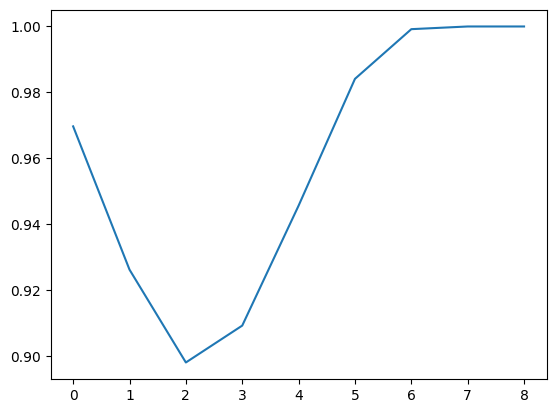

In [70]:
plt.plot(deltas)

In [65]:
theta = ((-sigma(t) * get_b)/(2*np.sqrt(t)))*scipy.stats.norm.pdf(d1) - r* Et * np.exp(-r*t)*scipy.stats.norm.cdf(d2)

/var/folders/5x/5z67klg92k997tvr4jjj1tt80000gn/T/ipykernel_29146/1502700922.py:1: RuntimeWarning: divide by zero encountered in divide
  theta = ((-sigma(t) * get_b)/(2*np.sqrt(t)))*scipy.stats.norm.pdf(d1) - r* Et * np.exp(-r*t)*scipy.stats.norm.cdf(d2)


In [66]:
theta

array([       -inf, -0.55486437, -0.50657412, -0.48617137, -0.47746018,
       -0.47831279, -0.48941319, -0.51038065, -0.54919318])

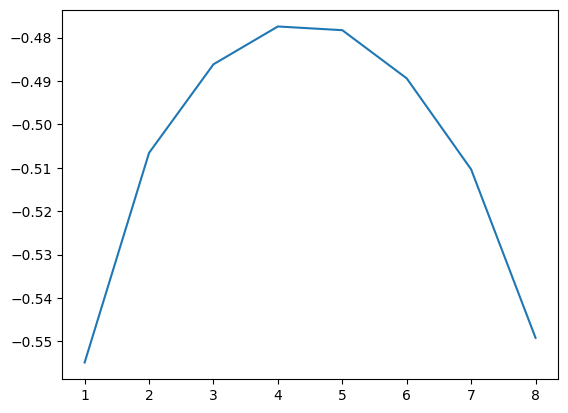

In [71]:
plt.plot(theta)

In [75]:
type(St)

numpy.float64

In [76]:
type(deltas)

list

In [73]:
risk_neutral = St*deltas



TypeError: can't multiply sequence by non-int of type 'numpy.float64'